## Business Understanding 
Purpose: Ask relevant questions and define objectives for the problem that needs to be tackled

## Background
In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative.

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project. A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.

### Final Deliverables


* Well designed presentation for non-technical stakeholders outlining findings and recommendations, as well as future work (10min presentation).
* Jupyter notebook following Data Science Lifecycle

### Things to think about

* Try different (at least 3) machine learning algorithms to check which performs best on the problem at hand
* What would be right performance metric: Precision, recall, accuracy, F1 score, or something else? (Check TPR?)
* Check for data imbalance


## Key Question 

We currently hold a task by Kickstarter to come up with a model to predict in a first step whether is project is likely to be successful, given certain project parameters. In a second step (out of scope), Kickstarter would like to be able to provide a good goal recommendation for creators( for example using staff picks etc.)

* Given certain project parameters, __is a campaign likely to succeed or fail?__ --> classification
* what would e a __reasonable goal reccomendation for creators__ --> regression



## Feature Glossary

Features included in model

* Target : state
*
*
*

## Dataset Description

- **backers_count**: Amount of people who backed this project
- **category**: 
- **country**: Country the project owner lives in
- **created_at**: Date when the prjoect was created
- **currency**: Currency of the country where the owner lives in
- **currency_trailing_code**: 
- **current_currency**: 
- **deadline**: Date until the project can be backed
- **disable_communication**: If the communication with owner was disabled or not
- **fx_rate**: Foreign exchange rate
- **goal**: Project is only funded when the goal amount is reached
- **launched_at**: Date when the project was launced
- **spotlight**: Highlighted projects (available to all projects that are successfully funded)
- **staff_pick**: Promissing project picked by Kickstarter employees
- **state**: Project status
- **state_changed_at**: Date when state changed the last time
- **static_usd_rate**: static USD Convergen rate at time
- **usd_pledged**: pledge amount converted to USD using Static_usd_rate


## Dataset New/Added Feature Description

- **campaign_days**: Days the Project was live
- **pledged_over**: Amount Pledged surpassing the Goal(with converted pledge amount) 
- **pre_launched_days**: Days before the Project was launched


## Target Metric

* F1 score — Since creators wouldn’t want the model to predict too many success that will turn out to be a failure (minimize False Positives) and backers would want to make sure the model capture as many success as possible (minimize False Negatives), I want a balance between precision and recall

## Outcome / Reccomendations
*
*
*

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import scipy as sc
from scipy.stats import kstest
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

#Data mining
import os, glob

#Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import imblearn
from imblearn.over_sampling import RandomOverSampler





## Dashboard
Purpose : Define global variables and visuals

In [3]:
random_state = 100
test_size = 0.3
sns.set(style = "white")

## Data Mining

In [4]:
# # Import multiple Kickstarter csv files and merge into one dataframe

# path = "data-2"
# all_files = glob.glob(os.path.join(path, "*.csv"))

# all_df = []
# for f in all_files:
#     df = pd.read_csv(f, sep=',')
#     df['file'] = f.split('/')[-1]
#     all_df.append(df)
    
# merged_df = pd.concat(all_df, ignore_index=True, sort=True)

In [5]:
merged_df = pd.read_csv('data-2/Kickstarter_all.csv') ### brauche ich wenn ich den Anderen Kram nicht laufen lassen will

## Inspection and Data Cleaning

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  file                      209222 non-null  o

In [7]:
#save the merged data as .zip
#compression_opts = dict(method='zip', archive_name='out.csv')  
#merged_df.to_csv('out.zip', index=False, compression=compression_opts)

In [8]:
# Display shape of "data"
merged_df.shape

(209222, 38)

In [9]:
merged_df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,...,babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,...,the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,...,record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,...,the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,...,help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.000000,domestic


In [10]:
merged_df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'file', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [11]:
merged_df.groupby('state').count()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,profile,slug,source_url,spotlight,staff_pick,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
state,,,,,,,,,,,,,,,,,,,,,
canceled,8624,8618,8624,8624,8624,8624,8624,8624,8624,8624,...,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624
failed,75199,75197,75199,75199,75199,75199,75199,75199,75199,75199,...,75199,75199,75199,75199,75199,75199,75199,75199,75199,75199
live,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,...,7311,7311,7311,7311,7311,7311,7311,7311,7311,6869
successful,117465,117465,117465,117465,117465,117465,117465,117465,117465,117465,...,117465,117465,117465,117465,117465,117465,117465,117465,117465,117427
suspended,623,623,623,623,623,623,623,623,623,623,...,623,623,623,623,623,623,623,623,623,623


In [12]:
pd.isnull(merged_df).sum()

backers_count                    0
blurb                            8
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
file                             0
friends                     208922
fx_rate                          0
goal                             0
id                               0
is_backing                  208922
is_starrable                     0
is_starred                  208922
launched_at                      0
location                       226
name                             0
permissions                 208922
photo                            0
pledged                          0
profile                          0
slug                

## Data Handling

In [13]:
# create a dataset for Inspection
final = merged_df.copy()

### Dropping Data

In [14]:
drop_list = []

#### Dropping features with missing values

In [15]:
drop_missing_values = ['blurb', 'friends', 'is_backing', 'is_starred', 'permissions', 'usd_type', 'location']
drop_list.extend(drop_missing_values)
final = final.drop(drop_missing_values, axis = 1)


#### Dropping useless features 

In [16]:
drop_useless_features = ['creator', 'currency_symbol', 'name', 'photo', 'profile', 'slug', 'source_url', 'urls', 'file']
drop_list.extend(drop_useless_features)
final = final.drop(drop_useless_features, axis = 1)

#### Dropping redundant features

In [17]:
drop_redundant_features = ['pledged', 'usd_pledged']
drop_list.extend(drop_redundant_features)
final = final.drop(drop_redundant_features, axis = 1)

In [18]:
drop_list

['blurb',
 'friends',
 'is_backing',
 'is_starred',
 'permissions',
 'usd_type',
 'location',
 'creator',
 'currency_symbol',
 'name',
 'photo',
 'profile',
 'slug',
 'source_url',
 'urls',
 'file',
 'pledged',
 'usd_pledged']

#### Replacing features

In [19]:
def clean_category(DataFrame): 
    cat_list = []
    subcat_list = []
    for e in DataFrame.category:
        string_list = e.split(',')
        if '/' in string_list[2]:
            cat_list.append(string_list[2].split('/')[0][8:])
            subcat_list.append(string_list[2].split('/')[1][:-1])
        else:
            cat_list.append(string_list[2][8:-1])
            subcat_list.append('None')
    DataFrame['category'] = cat_list
    DataFrame['sub_category'] = subcat_list
    return DataFrame

In [20]:
modified_list = ['category','state']

In [21]:
final = clean_category(final)

In [22]:
final.category.unique()

array(['fashion', 'games', 'music', 'publishing', 'theater', 'food',
       'art', 'photography', 'technology', 'dance', 'design',
       'film & video', 'crafts', 'comics', 'journalism'], dtype=object)

In [24]:
#replace successful and failed with 1 and 0
final.state.replace(['successful','failed'], [1,0],inplace=True)
# final.state = final.state.astype(int)
#

final.is_starrable = final.is_starrable.astype(int)
final.disable_communication = final.disable_communication.astype(int)
final.currency_trailing_code = final.currency_trailing_code.astype(int)
final.staff_pick = final.staff_pick.astype(int)
final.spotlight = final.spotlight.astype(int)
#drop live,susspended,cancelled
#final = final[final['state'] == [1,0]]
final = final.query('state == [1,0]')

### Time conversions



In [25]:
modified_list.extend(['launched_at', 'deadline', 'created_at', 'state_changed_at'])         

In [26]:
#converting unix time 
final.launched_at = pd.to_datetime(final.launched_at,unit='s',infer_datetime_format=True)
final.deadline = pd.to_datetime(final.deadline,unit='s',infer_datetime_format=True)
final.created_at = pd.to_datetime(final.created_at,unit='s',infer_datetime_format=True)
final.state_changed_at = pd.to_datetime(final.state_changed_at,unit='s',infer_datetime_format=True)

### Writing df changes

In [27]:
feature_list = list(merged_df.columns)

df_features = pd.DataFrame(feature_list,columns =['features'])
df_features['dropped'] = df_features.features.isin(drop_list)
df_features['drop_reason'] = ['missing_values' if x in drop_missing_values \
                              else 'useless' if x in drop_useless_features \
                              else 'redundant' if x in drop_redundant_features \
                              else 'None' for x in df_features['features']]
df_features['modified'] = df_features.features.isin(modified_list)

In [28]:
df_features

,features,dropped,drop_reason,modified
0,backers_count,False,None,False
1,blurb,True,missing_values,False
2,category,False,None,True
3,converted_pledged_amount,False,None,False
4,country,False,None,False
5,created_at,False,None,True
6,creator,True,useless,False
7,currency,False,None,False
8,currency_symbol,True,useless,False
9,currency_trailing_code,False,None,False


# Data Exploration
Purpose: we gotta form a hypotheses / story about our defined problem by visually analyzing the data

In [29]:
#new dataset for exploration
data_exp = final.copy()

In [30]:
#years
#final['launched_at_yr'] = [date.year for date in final['launched_at']]

In [31]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 1 to 209221
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   backers_count             192664 non-null  int64         
 1   category                  192664 non-null  object        
 2   converted_pledged_amount  192664 non-null  int64         
 3   country                   192664 non-null  object        
 4   created_at                192664 non-null  datetime64[ns]
 5   currency                  192664 non-null  object        
 6   currency_trailing_code    192664 non-null  int64         
 7   current_currency          192664 non-null  object        
 8   deadline                  192664 non-null  datetime64[ns]
 9   disable_communication     192664 non-null  int64         
 10  fx_rate                   192664 non-null  float64       
 11  goal                      192664 non-null  float64       
 12  id

In [32]:
# Seperate continious vs. categorical variables
data_cat_col = ['category','country','sub_category','country','currency','current_currency','is_starrable','disable_communication','state']
data_cont_col = [x for x in final if x not in data_cat_col]
data_cat = final[data_cat_col]
data_cont = final[data_cont_col]

In [33]:
# Check if scaling is needed ( we can do this by looking at the .skew()
final.skew()

backers_count               41.997986
converted_pledged_amount    34.422017
currency_trailing_code      -1.671302
disable_communication        0.000000
fx_rate                     -2.244813
goal                        73.476994
id                          -0.002373
is_starrable                 0.000000
spotlight                   -0.449712
staff_pick                   2.137329
state                       -0.449712
static_usd_rate             -1.144525
dtype: float64

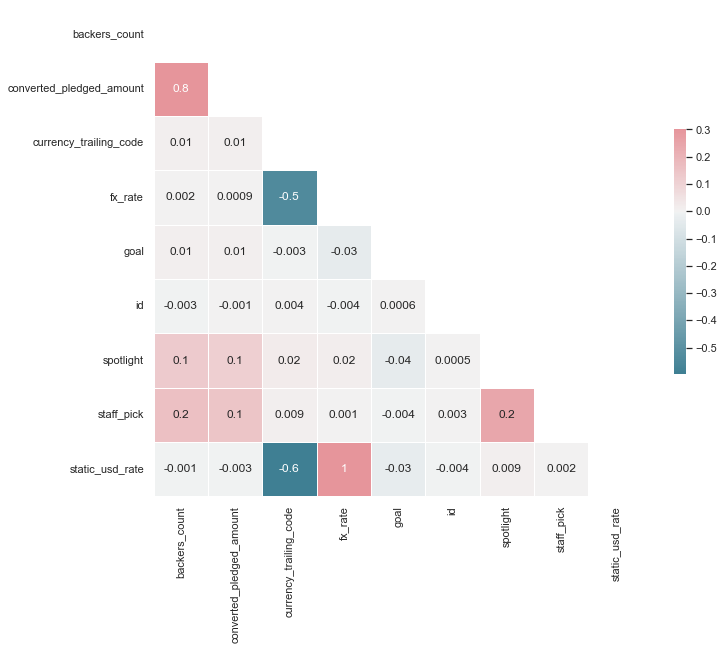

In [34]:
#Plot correlation heatmap for continious values
mask = np.triu(np.ones_like(data_cont.corr(), dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data_cont.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1g");


<AxesSubplot:>

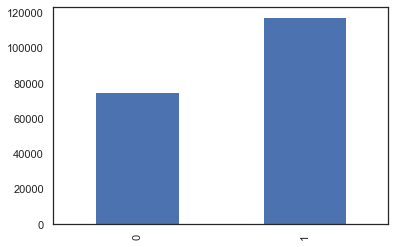

In [35]:
#Plot a histogram of our Target 'state' and see if it needs scaling for future work
data_exp['state'].value_counts(ascending=True).plot(kind='bar')

* imbalanced data!!

# Feature Engineering

In [36]:
new_features_list = ['pledged_over', 'campaign_days', 'pre_launched_days', 'launched_at_yr', 'goal_converted']

In [37]:
#create new features
final['pledged_over'] = final.converted_pledged_amount - final.goal 
final['campaign_days'] = ((final.deadline - final.launched_at)/ np.timedelta64(1, 'h')).astype(int)
final['pre_launched_days'] = ((final.launched_at - final.created_at)/ np.timedelta64(1, 'h')).astype(int)

final['launched_at_yr'] = [date.year for date in final['launched_at']]
final['launched_at_mth'] = [date.month for date in final['launched_at']]

final['goal_converted'] = final["goal"] * final["static_usd_rate"]
#use log on goal_converted

In [38]:
#use log on stuff
final['goal_converted_log'] = [math.log(el) for el in final['goal_converted']]
final['converted_pledged_amount_log'] = np.log(final['converted_pledged_amount'])
final['backers_count_log'] = np.log(final['backers_count'])

In [39]:
#define predictors and target variable X,y
X = final.drop(["state"], axis=1)
y = final["state"]

In [40]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=test_size,
                                                        random_state=random_state,
                                                        shuffle=True,
                                                   stratify=y)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [41]:
# create a dummy classifier model as Basemodel
dum_clf = DummyClassifier(strategy='constant',constant=1).fit(X_train,y_train)
y_pred_dum_clf = dum_clf.predict(X_test)

print(confusion_matrix(y_test,y_pred_dum_clf))
print(classification_report(y_test,y_pred_dum_clf))


ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [ ]:
#for future work
#scores = cross_val_score(dummy_clf, X_train, y_train, scoring='f1', cv=10, n_jobs=-1)

In [ ]:
#use oversampling

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=random_state)
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(np.array(X_train), np.array(y_train))



In [ ]:
sum(y_train_over)

In [ ]:
len(y_train_over)

In [ ]:
features_scalable_list = ['backers_count',
 'converted_pledged_amount',
 'goal', 'pledged_over', 'goal_converted']

In [ ]:
data_cont_col

In [ ]:
X_train[features_scalable_list]

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
#use standard scaler on X_train and y_train
scaler = StandardScaler()
X_train_scaled[features_scalable_list] = scaler.fit_transform(np.array(X_train[features_scalable_list])) # Scaler is fitted to training data _only_
X_test_scaled[features_scalable_list] = scaler.transform(np.array(X_test[features_scalable_list])) # Already fitted scaler is applied to test data


#data_cat_col = ['category','country','sub_category','country','currency','current_currency','is_starrable','disable_communication']
#data_cont_col = [x for x in final if x not in data_cat_col]

In [ ]:
#use standard scaler on X_train_over and y_train_over

In [ ]:
# To do: save final df as csv
#compression_opts = dict(method='zip', archive_name='Kickstarter_all_clean.csv')  
#final.to_csv('Kickstarter_all_clean.zip', index=False, compression=compression_opts)

* using f1 score as our metric

In [ ]:
#logistic regression

In [ ]:
#Random Forest Classifier

In [ ]:
#Support Vector Machines (use classifier)

In [ ]:
#maybe AdaBoost

In [ ]:
#use KNN,SVC,DTC,Randomforestclassifier,XGB....

In [ ]:
#use maybe RandomizedSearchCV on RandomForest or any given Algorithm

# Plots

## Idea

- which are the top (5) categories for successfull kickstarter projects?
- goal amount as important feature: bin the amounts and plot them over successfull projects count. 
- add month variable to show which month for launching the project is the most promising.
- show successrates of projects over the years: Kickstarter, still worth it?

- check if year plots ends early for 2019 (Tolga Plots)

- Feature Importances ADA Boost top (5) categories
  - cat_theater	0.010248
  - cat_technology	0.004989
  - cat_food	0.004828
  - cat_film & video	0.004566
  - cat_journalism	0.004022

### Implimentation

#### 1

In [ ]:
look_at = ['category', 'state']

In [99]:
Category_succesrate = final[look_at].groupby('category').sum() / final[look_at].groupby('category').count()
Category_succesrate = Category_succesrate.sort_values(by = 'state', ascending= False).reset_index()
Category_succesrate

,category,state
0,comics,0.841148
1,dance,0.840521
2,theater,0.742667
3,publishing,0.729535
4,design,0.709375
5,music,0.689313
6,games,0.666078
7,fashion,0.646786
8,film & video,0.613067
9,art,0.602279


Text(0.5, 1.0, 'Category vs Success rate')

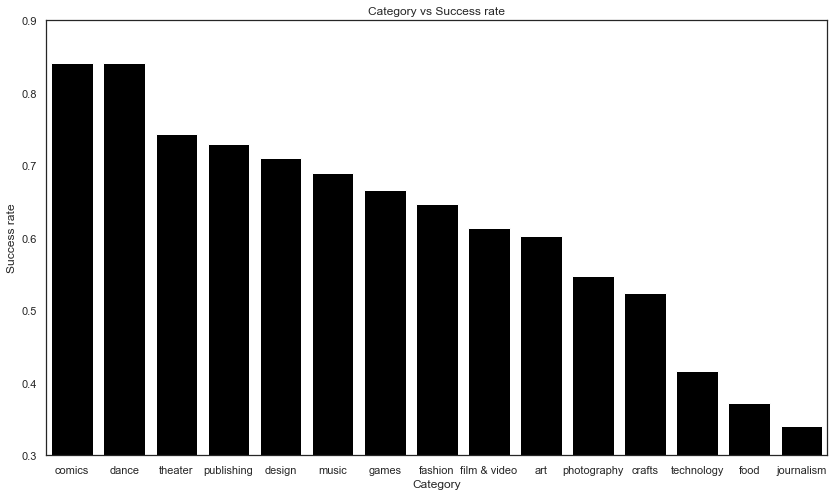

In [268]:
plt.figure(figsize=(14,8))
sns.barplot(x = Category_succesrate.category, y = Category_succesrate.state,
             data=Category_succesrate,
           color="black"
           );
plt.ylim(0.3, 0.9)
plt.xlabel("Category")
plt.ylabel("Success rate")
plt.title("Category vs Success rate") # You can comment this line out if you don't need title

# ax.set_xlabel("Category",fontsize=18)
# ax.set_ylabel("Success rate",fontsize=18)

#### 3

In [141]:
look_at = ['state', 'launched_at_mth']
Month = final[look_at]

In [142]:
final[look_at].groupby('launched_at_mth').sum()

,state
launched_at_mth,
1,9909
2,9448
3,9953
4,9745
5,10340
6,9981
7,9797
8,9667
9,10319


In [144]:
month_succesrate = final[look_at].groupby('launched_at_mth').sum() / final[look_at].groupby('launched_at_mth').count()
month_succesrate = month_succesrate.sort_values(by = 'state', ascending= False).reset_index()
month_succesrate

,launched_at_mth,state
0,10,0.641956
1,9,0.625697
2,4,0.623361
3,3,0.621713
4,11,0.617946
5,1,0.617422
6,2,0.615345
7,5,0.614744
8,6,0.608004
9,8,0.590243


Text(0.5, 1.0, 'Month vs Success rate')

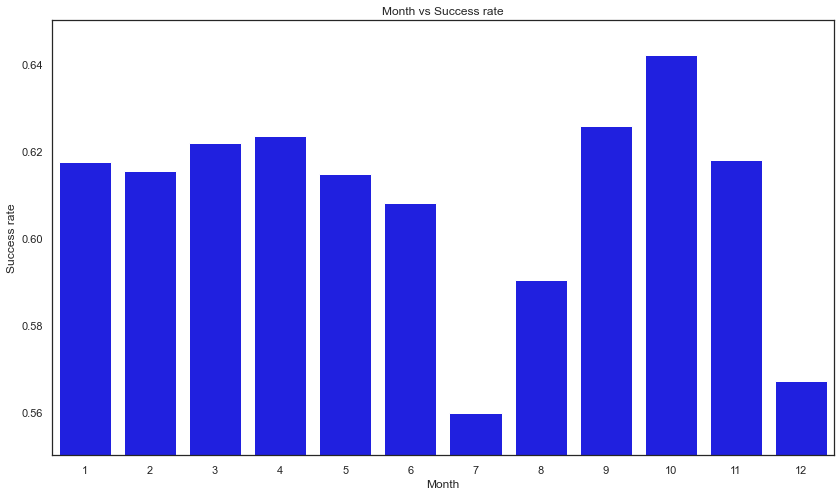

In [239]:
plt.figure(figsize=(14,8))
sns.barplot(x = month_succesrate.launched_at_mth, y = month_succesrate.state,
             data=month_succesrate,
           color="blue"
           );
plt.ylim(0.55, 0.65)
plt.xlabel("Month")
plt.ylabel("Success rate")
plt.title("Month vs Success rate")
# ax.set_xlabel("Category",fontsize=18)
# ax.set_ylabel("Projects",fontsize=18)

#### 4

In [288]:
look_at = ['state', 'launched_at_yr']
year = final[look_at]
year_succesrate = final[look_at].groupby('launched_at_yr').sum() / final[look_at].groupby('launched_at_yr').count()
year_succesrate = year_succesrate.sort_values(by = 'state', ascending= False).reset_index()
year_succesrate = year_succesrate[year_succesrate['launched_at_yr'] != 2019]

Text(0.5, 1.0, 'Year vs Success rate')

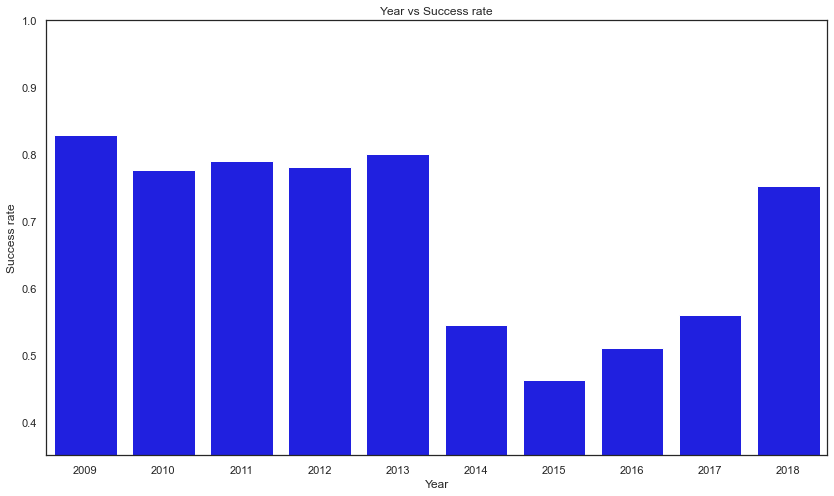

In [289]:
plt.figure(figsize=(14,8))
fig = sns.barplot(x = year_succesrate.launched_at_yr, y = year_succesrate.state,
             data=year_succesrate,
           color="blue"
           );
plt.ylim(0.35, 1)
plt.xlabel("Year")
plt.ylabel("Success rate")
plt.title("Year vs Success rate") 
# ax.set(xlabel='Year', ylabel='Success rate')
# ax.set_xlabel("Category",fontsize=18)
# ax.set_ylabel("Projects",fontsize=18)

##### Checking Year 2019

In [287]:
look_at = ['state', 'launched_at_yr', 'launched_at_mth']
year_month = final[look_at]
year_month_2019 = year_month[year_month['launched_at_yr'] == 2019]
year_month_2019.launched_at_mth.unique()

array([1, 2, 3])

#### 2

##### Creating bins

In [172]:
df_bins = final.copy()

In [173]:
df_bins['5_bins'] = pd.qcut(df_bins['goal'], q=5, precision=0)

In [174]:
df_bins['5_bins'].unique()

[(-1.0, 1000.0], (7000.0, 20000.0], (1000.0, 3000.0], (3000.0, 7000.0], (20000.0, 100000000.0]]
Categories (5, interval[float64, right]): [(-1.0, 1000.0] < (1000.0, 3000.0] < (3000.0, 7000.0] < (7000.0, 20000.0] < (20000.0, 100000000.0]]

In [175]:
df_bins['quartiles_bins'] = pd.qcut(df_bins['goal'], q=4, precision=0)
df_bins['deciles_bins'] = pd.qcut(df_bins['goal'], q=10,precision=0)

In [176]:
df_bins['quartiles_bins'].unique()

[(-1.0, 1500.0], (5000.0, 15000.0], (1500.0, 5000.0], (15000.0, 100000000.0]]
Categories (4, interval[float64, right]): [(-1.0, 1500.0] < (1500.0, 5000.0] < (5000.0, 15000.0] < (15000.0, 100000000.0]]

In [177]:
df_bins['deciles_bins'].unique()

[(500.0, 1000.0], (10000.0, 20000.0], (7000.0, 10000.0], (2000.0, 3000.0], (3000.0, 5000.0], (-1.0, 500.0], (40000.0, 100000000.0], (5000.0, 7000.0], (1000.0, 2000.0], (20000.0, 40000.0]]
Categories (10, interval[float64, right]): [(-1.0, 500.0] < (500.0, 1000.0] < (1000.0, 2000.0] < (2000.0, 3000.0] ... (7000.0, 10000.0] < (10000.0, 20000.0] < (20000.0, 40000.0] < (40000.0, 100000000.0]]

##### Bin Plots

In [178]:
look_at = ['state', '5_bins', 'quartiles_bins', 'deciles_bins']

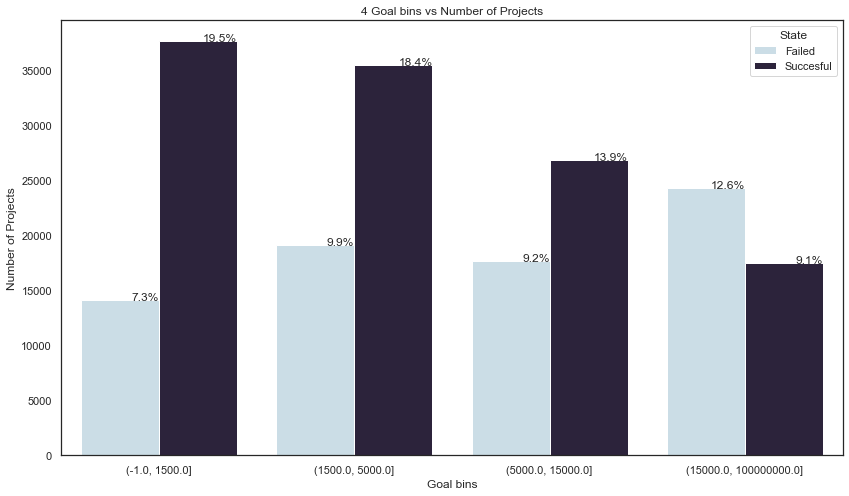

In [267]:
plt.figure(figsize=(14,8))
total = float(len(df_bins))

ax = sns.countplot(x='quartiles_bins', hue='state',palette="ch:s=.25,rot=-.25", data=df_bins)
ax.set_xlabel("Goal bins")
ax.set_ylabel("Number of Projects")
# plt.xlabel("Category")
# plt.ylabel("Success rate")
plt.title("4 Goal bins vs Number of Projects") 
plt.legend(title='State', loc='upper right', labels=['Failed', 'Succesful'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

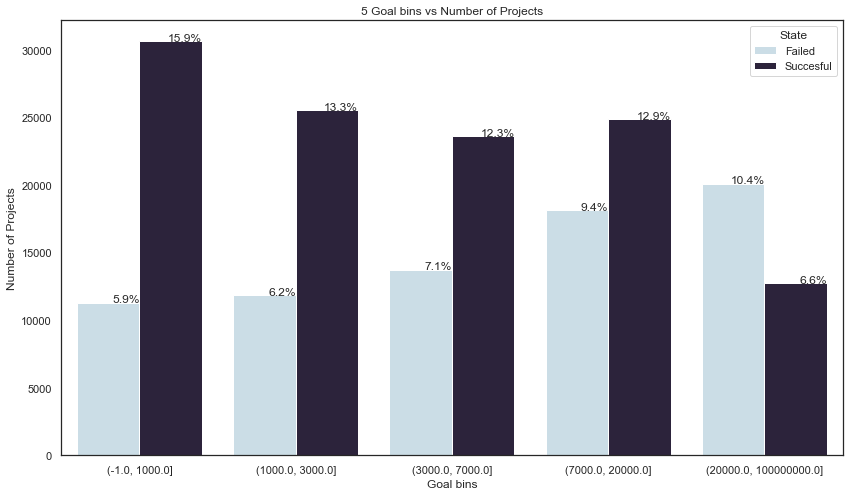

In [266]:
plt.figure(figsize=(14,8))
total = float(len(df_bins))

ax = sns.countplot(x='5_bins', hue='state',palette="ch:s=.25,rot=-.25", data=df_bins)
ax.set_xlabel("Goal bins")
ax.set_ylabel("Number of Projects")
plt.title("5 Goal bins vs Number of Projects")
plt.legend(title='State', loc='upper right', labels=['Failed', 'Succesful'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

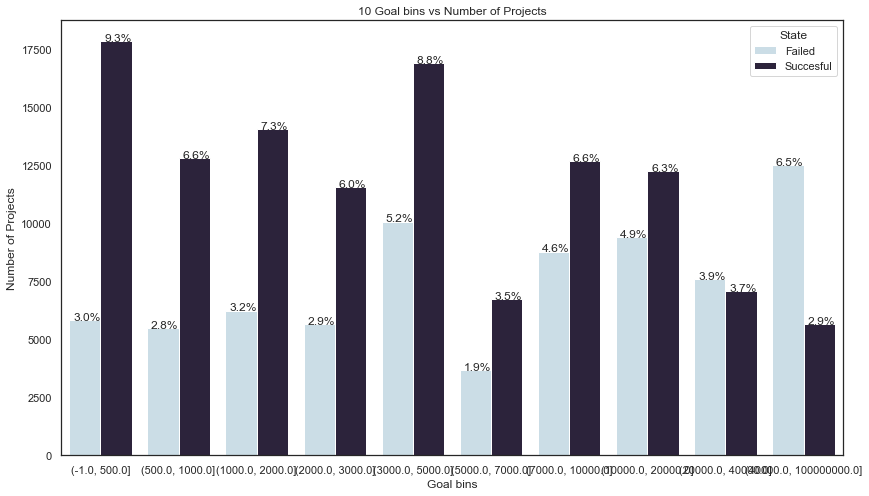

In [265]:
plt.figure(figsize=(14,8))
total = float(len(df_bins))

ax = sns.countplot(x='deciles_bins', hue='state',palette="ch:s=.25,rot=-.25", data=df_bins)
ax.set_xlabel("Goal bins")
ax.set_ylabel("Number of Projects")
plt.title("10 Goal bins vs Number of Projects")
plt.legend(title='State', loc='upper right', labels=['Failed', 'Succesful'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

In [190]:
look_at = ['state', '5_bins'
           # , 'quartiles_bins', 'deciles_bins'
          ]
five_bins = df_bins[look_at]
five_bins_succesrate = df_bins[look_at].groupby('5_bins').sum() / df_bins[look_at].groupby('5_bins').count()
five_bins_succesrate = five_bins_succesrate.sort_values(by = 'state', ascending= False).reset_index()
five_bins_succesrate

,5_bins,state
0,"(-1.0, 1000.0]",0.730590
1,"(1000.0, 3000.0]",0.682694
2,"(3000.0, 7000.0]",0.632246
3,"(7000.0, 20000.0]",0.578137
4,"(20000.0, 100000000.0]",0.387623


Text(0.5, 1.0, 'Goal in 5Bins vs Success rate')

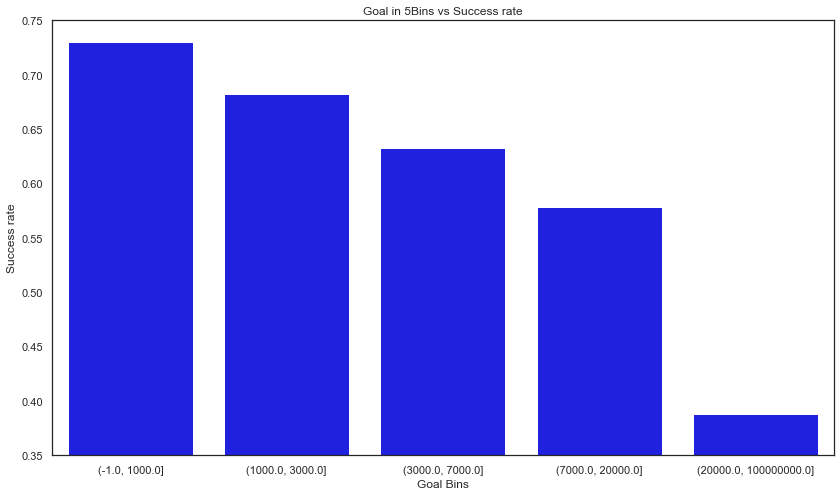

In [247]:
plt.figure(figsize=(14,8))
sns.barplot(x = five_bins_succesrate['5_bins'], y = five_bins_succesrate.state,
             data=five_bins_succesrate,
           color="blue"
           );
plt.ylim(0.35, 0.75)
plt.xlabel("Goal Bins")
plt.ylabel("Success rate")
plt.title("Goal in 5Bins vs Success rate") # You can comment this line out if you don't need title
# ax.set_xlabel("Category",fontsize=18)
# ax.set_ylabel("Projects",fontsize=18)

##### Good Categories 5Bins plots

###### Comics 5Bins plot

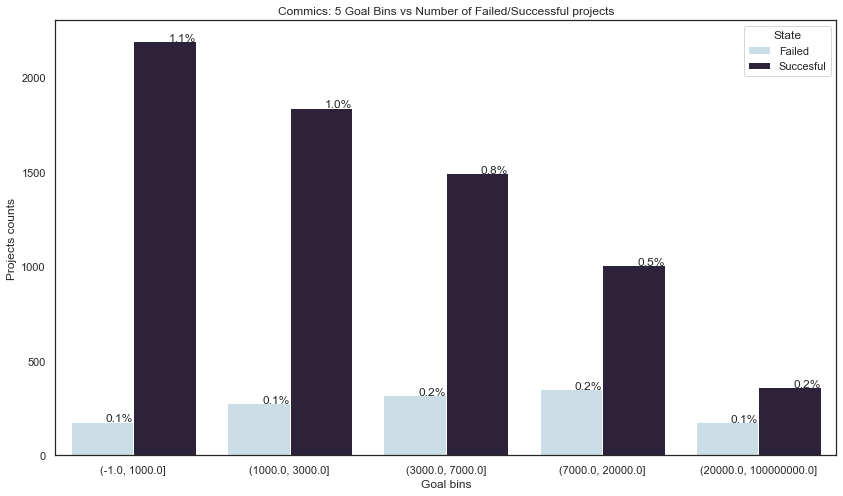

In [280]:
plt.figure(figsize=(14,8))
total = float(len(df_bins))

ax = sns.countplot(x='5_bins', hue='state',palette="ch:s=.25,rot=-.25", 
                   data=df_bins[df_bins['category'] == 'comics'])
ax.set_xlabel("Goal bins")
ax.set_ylabel("Projects counts")
plt.title("Commics: 5 Goal Bins vs Number of Failed/Successful projects") # You can comment this line out if you don't need title
plt.legend(title='State', loc='upper right', labels=['Failed', 'Succesful'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

###### Dance 5Bins

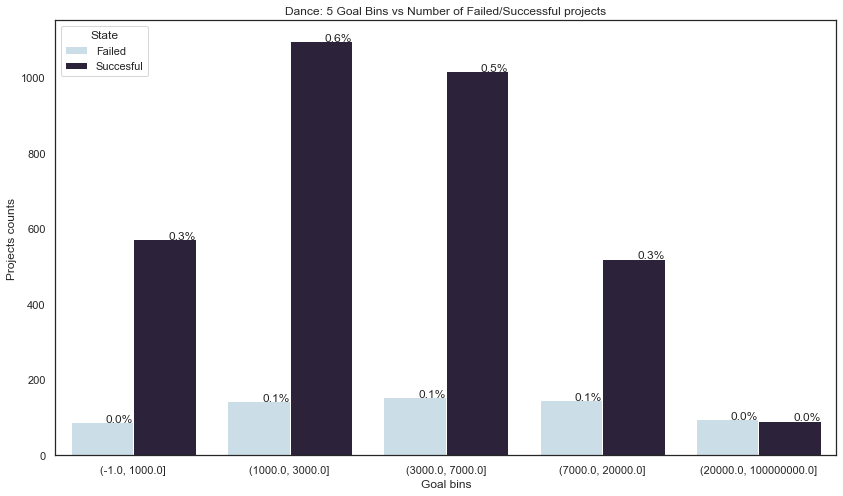

In [279]:
plt.figure(figsize=(14,8))
total = float(len(df_bins))

ax = sns.countplot(x='5_bins', hue='state',palette="ch:s=.25,rot=-.25", 
                   data=df_bins[df_bins['category'] == 'dance'])
ax.set_xlabel("Goal bins")
ax.set_ylabel("Projects counts")
plt.title("Dance: 5 Goal Bins vs Number of Failed/Successful projects") # You can comment this line out if you don't need title
plt.legend(title='State', loc='upper left', labels=['Failed', 'Succesful'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

###### Theater 5bins

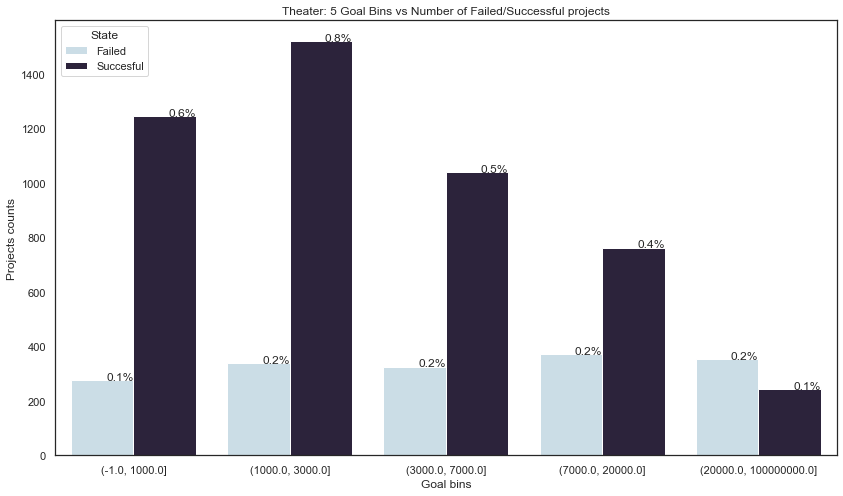

In [278]:
plt.figure(figsize=(14,8))
total = float(len(df_bins))

ax = sns.countplot(x='5_bins', hue='state',palette="ch:s=.25,rot=-.25", 
                   data=df_bins[df_bins['category'] == 'theater'])
ax.set_xlabel("Goal bins")
ax.set_ylabel("Projects counts")
plt.title("Theater: 5 Goal Bins vs Number of Failed/Successful projects") # You can comment this line out if you don't need title
plt.legend(title='State', loc='upper left', labels=['Failed', 'Succesful'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### Bad Categories 5Bins plots

###### Technologie 5bins

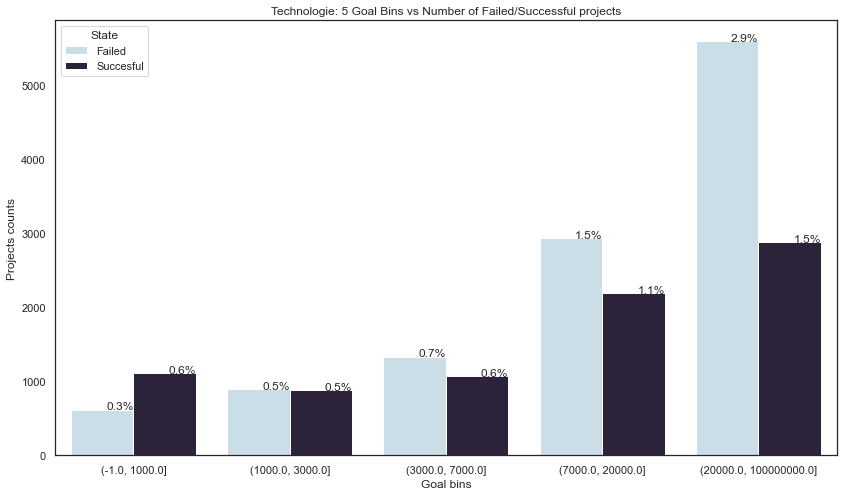

In [277]:
plt.figure(figsize=(14,8))
total = float(len(df_bins))

ax = sns.countplot(x='5_bins', hue='state',palette="ch:s=.25,rot=-.25", 
                   data=df_bins[df_bins['category'] == 'technology'])
ax.set_xlabel("Goal bins")
ax.set_ylabel("Projects counts")
plt.title("Technologie: 5 Goal Bins vs Number of Failed/Successful projects") # You can comment this line out if you don't need title
plt.legend(title='State', loc='upper left', labels=['Failed', 'Succesful'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

###### Food 5Bins

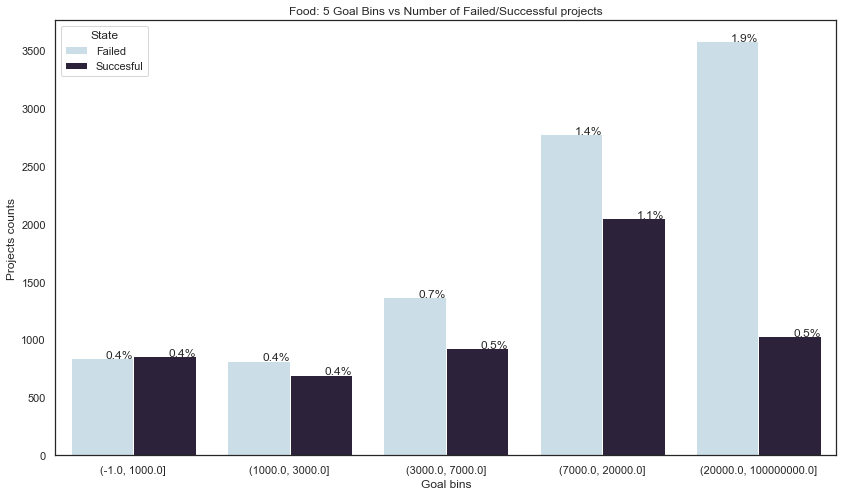

In [276]:
plt.figure(figsize=(14,8))
total = float(len(df_bins))

ax = sns.countplot(x='5_bins', hue='state',palette="ch:s=.25,rot=-.25", 
                   data=df_bins[df_bins['category'] == 'food'])
ax.set_xlabel("Goal bins")
ax.set_ylabel("Projects counts")
plt.title("Food: 5 Goal Bins vs Number of Failed/Successful projects") # You can comment this line out if you don't need title
plt.legend(title='State', loc='upper left', labels=['Failed', 'Succesful'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

###### Journalism 5Bins

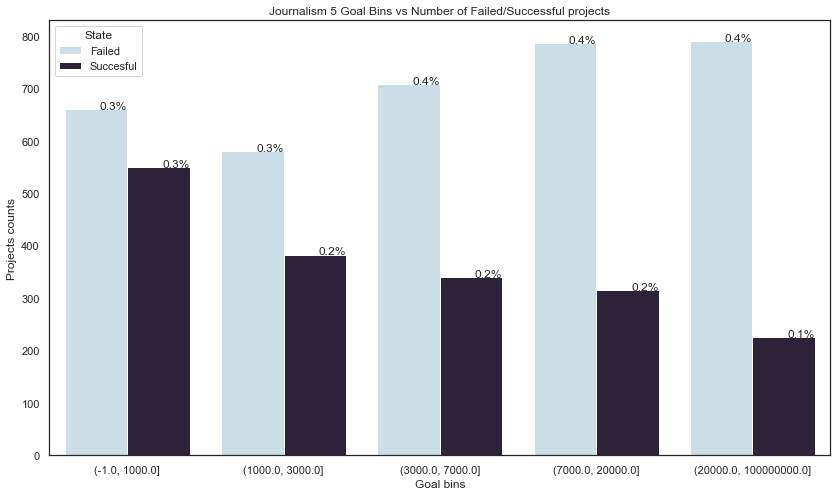

In [275]:
plt.figure(figsize=(14,8))
total = float(len(df_bins))

ax = sns.countplot(x='5_bins', hue='state',palette="ch:s=.25,rot=-.25", 
                   data=df_bins[df_bins['category'] == 'journalism'])
ax.set_xlabel("Goal bins")
ax.set_ylabel("Projects counts")
plt.title("Journalism: 5 Goal Bins vs Number of Failed/Successful projects") # You can comment this line out if you don't need title
plt.legend(title='State', loc='upper left', labels=['Failed', 'Succesful'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

## From Tolgas Notebook

#### Histplot

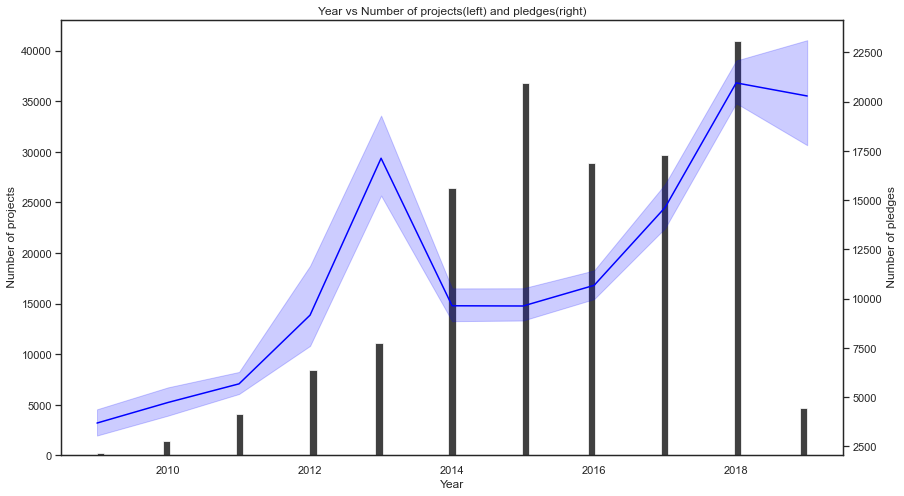

In [272]:
fig=plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
#width = [4,2,3,1,5,3,5,7,8,7]
# changes here
ax1 = sns.histplot(x=final.launched_at_yr, data=final,color="black",ax=ax1)
sns.lineplot(x=final.launched_at_yr, y=final.converted_pledged_amount,data=data_exp,color="blue", ax=ax2)

ax1.set_xlabel("Year")
ax1.set_ylabel(r" Number of projects")
ax2.set_ylabel(r" Number of pledges")

plt.title("Year vs Number of projects(left) and pledges(right)")

# and here
#plt.xticks(data_exp.index, rotation=60)
plt.show()

#### Twin Plot

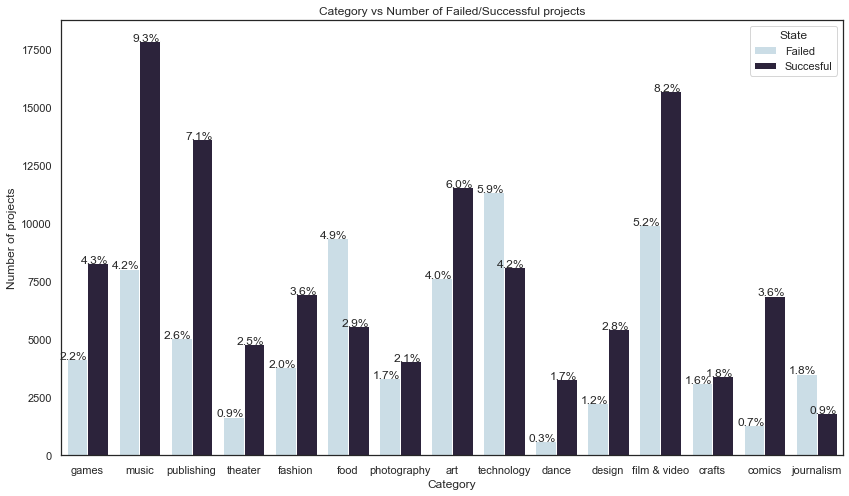

In [274]:
plt.figure(figsize=(14,8))
total = float(len(data_exp))

ax = sns.countplot(x='category', hue='state',palette="ch:s=.25,rot=-.25", data=data_exp)
ax.set_xlabel("Category")
ax.set_ylabel(r"Number of projects")
plt.legend(title='State', loc='upper right', labels=['Failed', 'Succesful'])
plt.title("Category vs Number of Failed/Successful projects")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

#### Old Plots

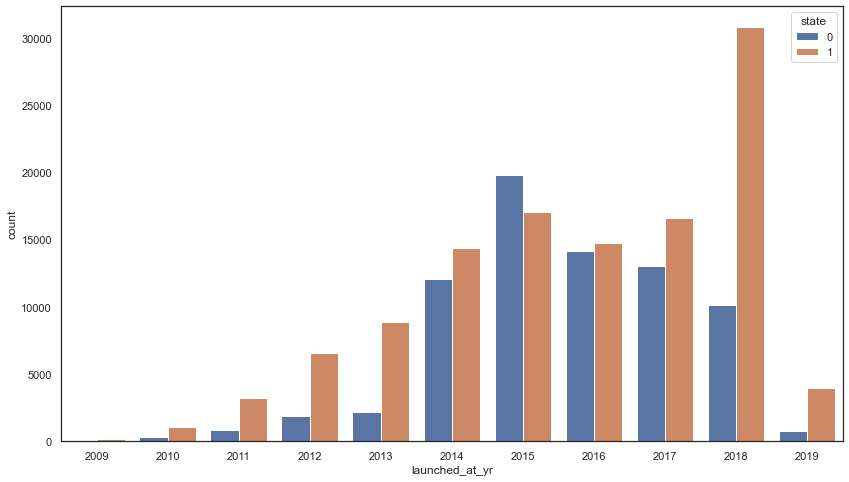

In [183]:
plt.figure(figsize=(14,8))
sns.countplot(x='launched_at_yr', hue='state', data=final);

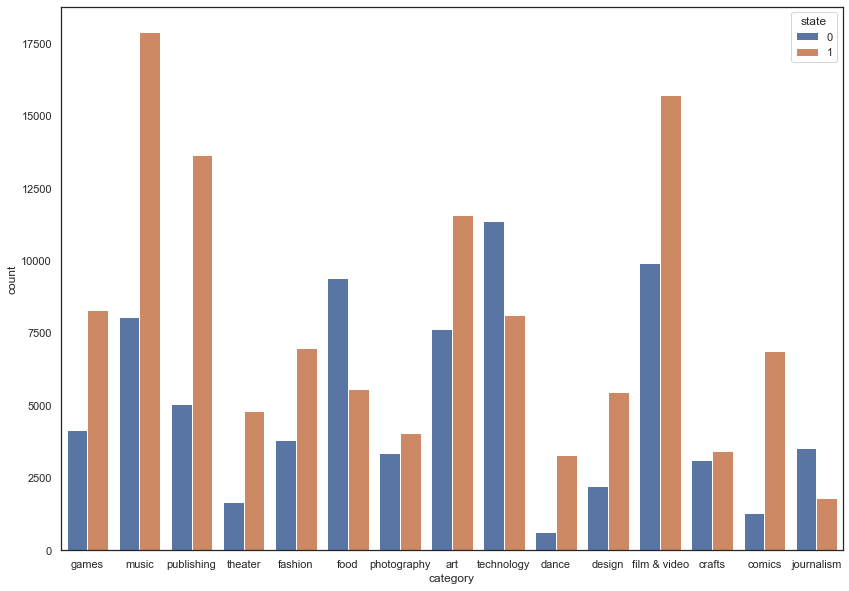

In [184]:
plt.figure(figsize=(14,10))
sns.countplot(x='category', hue='state', data=final);